# <span style = "color: gray"> Airline Passenger Satisfaction Prediction </span>

***

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

## <span style = "color : blue"> Content </span>

* Gender: Gender of the passengers (Female, Male)

* Customer Type: The customer type (Loyal customer, disloyal customer)

* Age: The actual age of the passengers

* Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

* Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

* Flight distance: The flight distance of this journey

* Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

* Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

* Ease of Online booking: Satisfaction level of online booking

* Gate location: Satisfaction level of Gate location

* Food and drink: Satisfaction level of Food and drink

* Online boarding: Satisfaction level of online boarding

* Seat comfort: Satisfaction level of Seat comfort

* Inflight entertainment: Satisfaction level of inflight entertainment

* On-board service: Satisfaction level of On-board service

* Leg room service: Satisfaction level of Leg room service

* Baggage handling: Satisfaction level of baggage handling

* Check-in service: Satisfaction level of Check-in service

* Inflight service: Satisfaction level of inflight service

* Cleanliness: Satisfaction level of Cleanliness

* Departure Delay in Minutes: Minutes delayed when departure

* Arrival Delay in Minutes: Minutes delayed when Arrival

* Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Let's dive into it

### Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'airline_passenger_satisfaction.csv' dataset and store it in a DataFrame

In [ ]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

### View the top 5 rows

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

### Find info of the dataset

In [ ]:
df.info()

### Find basic statistical information about the dataset

In [ ]:
df.describe()

### Check for any null values

In [ ]:
df.isna().sum()

### Fill missing value with mean

In [ ]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(),inplace=True)



In [ ]:
df.isna().sum()


### View unique values in all categorical columns

In [ ]:
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel','Class', 'satisfaction']


for feature in categorical_columns:
    print(f'Unique values in {feature}',df[feature].unique().tolist())

### Change values in satisfaction to:
* Neutral to 1
* Dissatisfied to 0
* Satisfied to 1


In [ ]:
def satisfied(x):
    if x == 'neutral or dissatisfied':
        return 0
    else:
        return 1

In [ ]:
df['satisfaction']= df['satisfaction'].apply(satisfied)

In [ ]:
df.head()

In [ ]:
df['satisfaction'].unique()

### Drop Unnamed: 0 and id column

In [ ]:
df.drop(columns=['Unnamed: 0','id'],inplace=True)

In [ ]:
df.head()

### Change the rest of the categorical data into nominal using OneHotEncoding

In [ ]:
df = pd.get_dummies(df,dtype=int)

In [ ]:
df

# <span style = "color : red"> Visualization </span>

### Plot a pairplot of the dataset

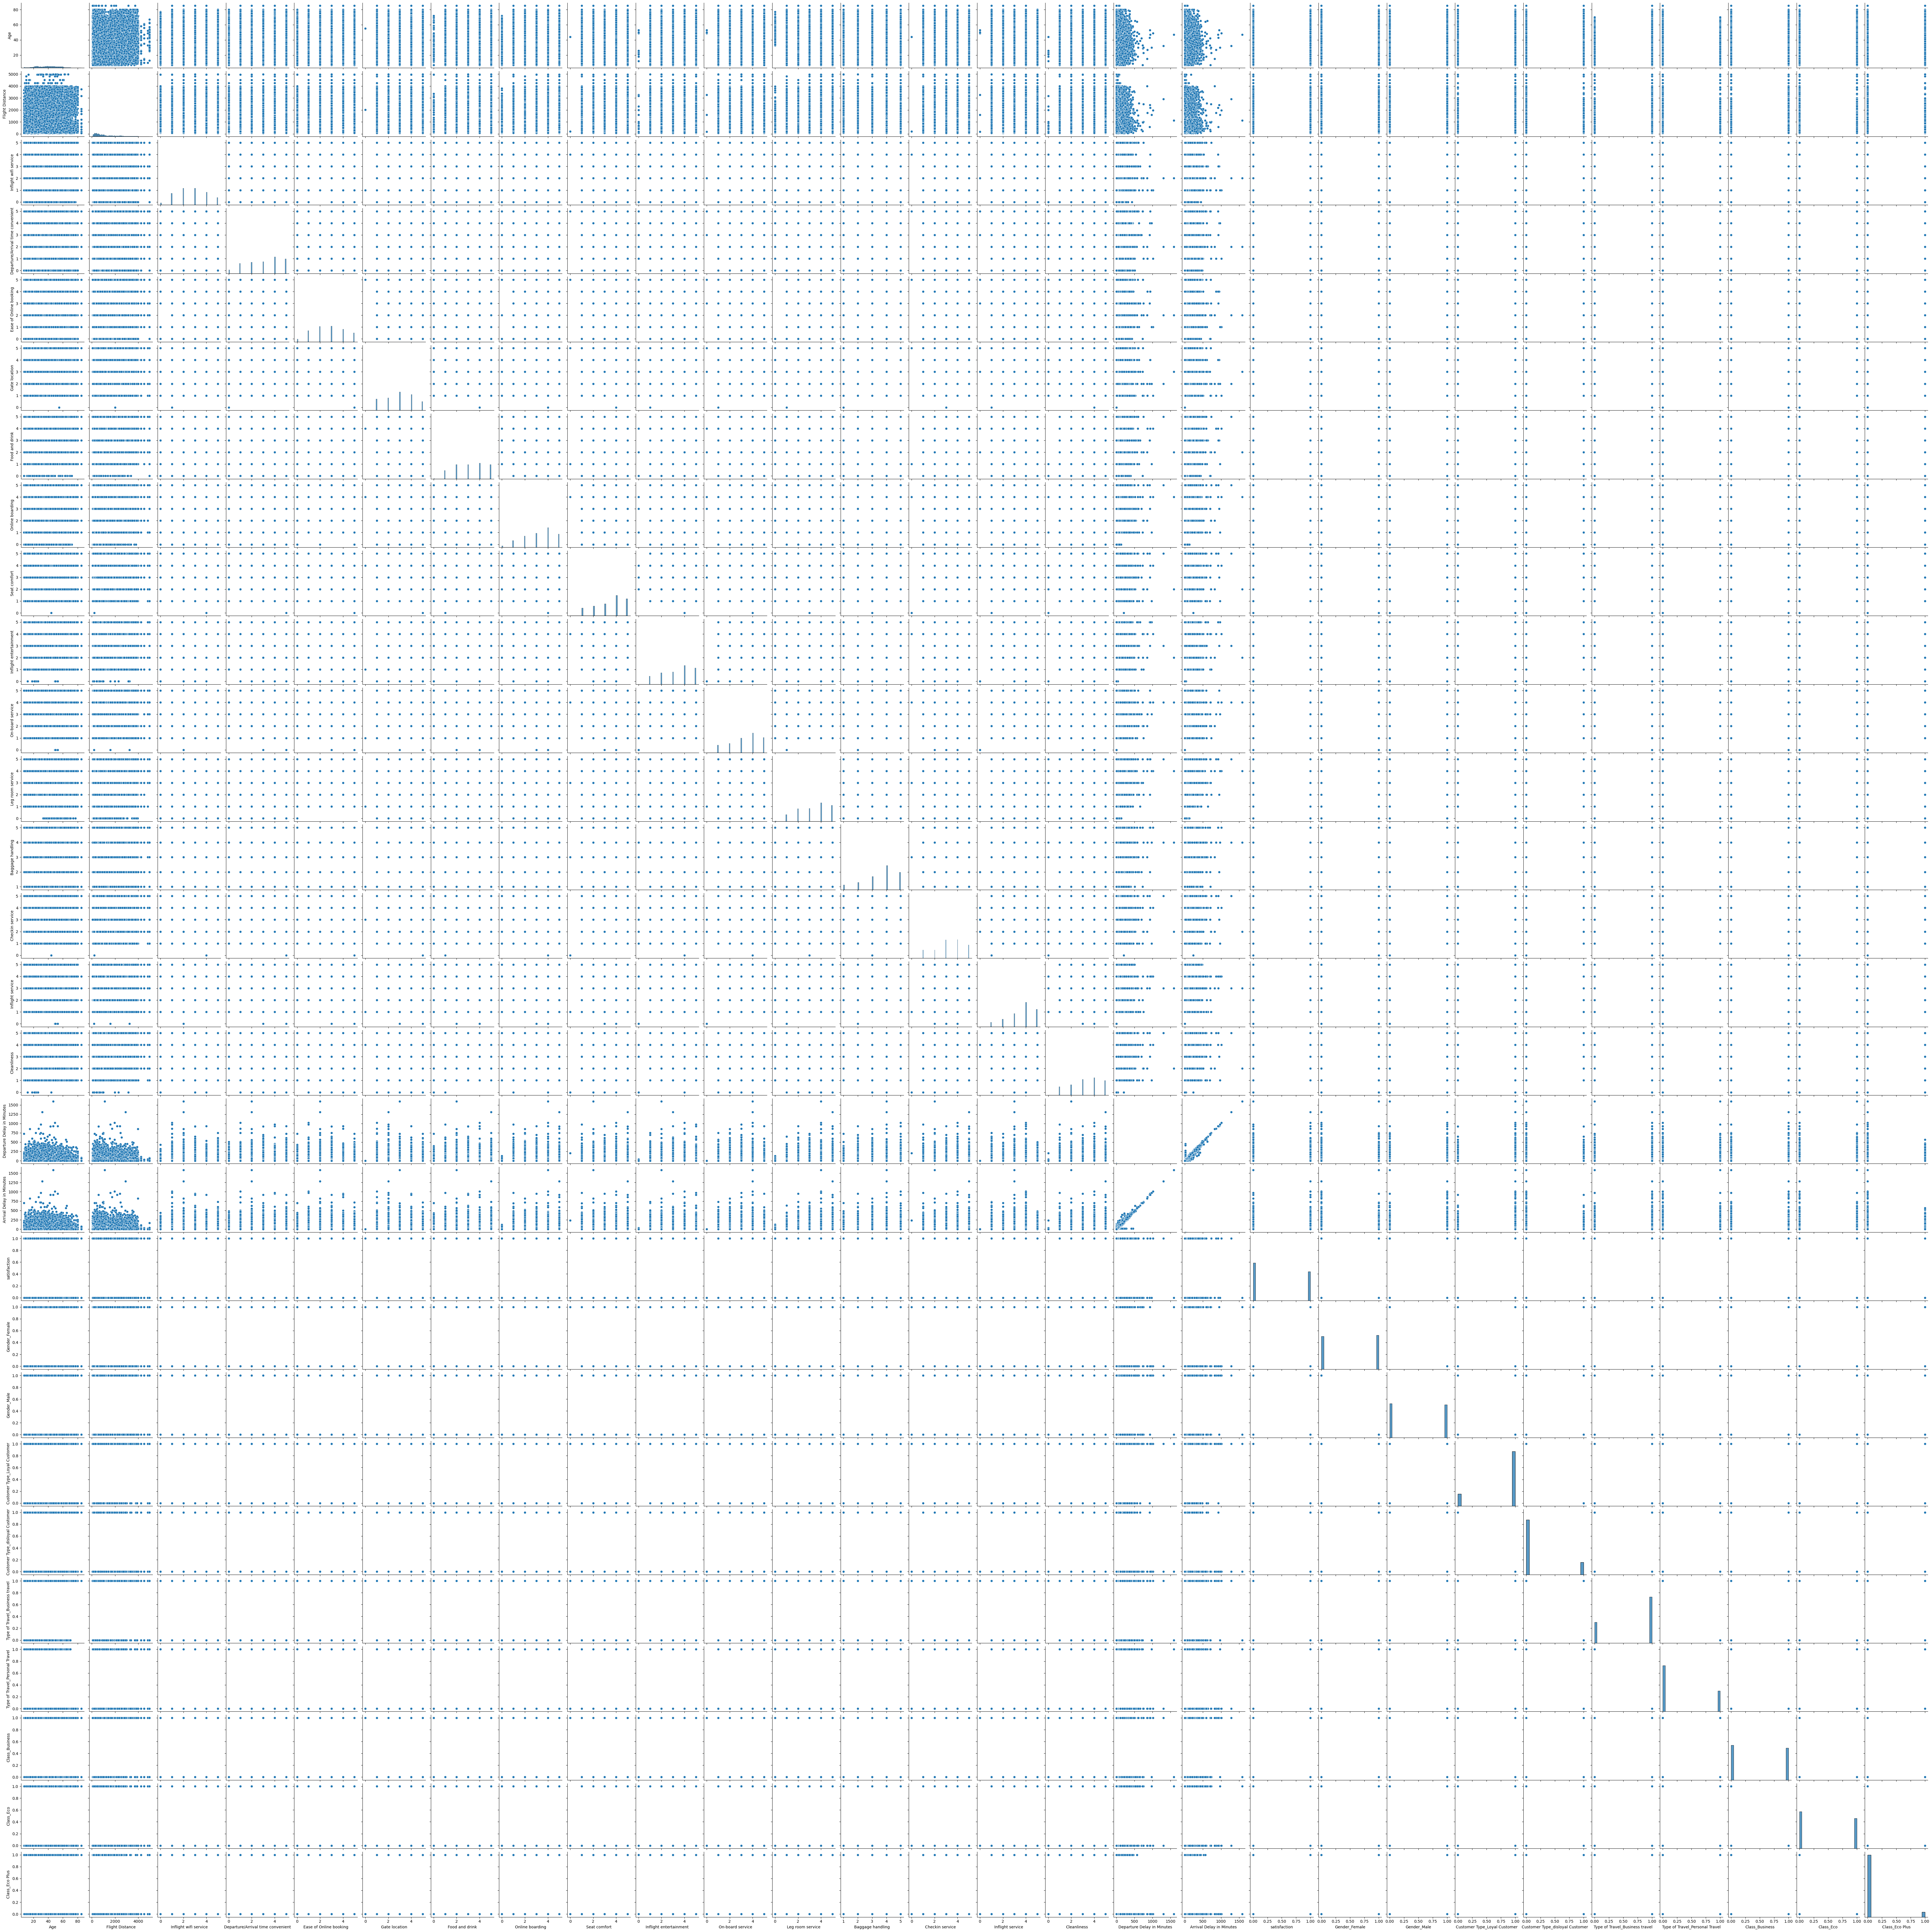

In [95]:
sns.pairplot(df)


### Plot a countplot of Type of travel

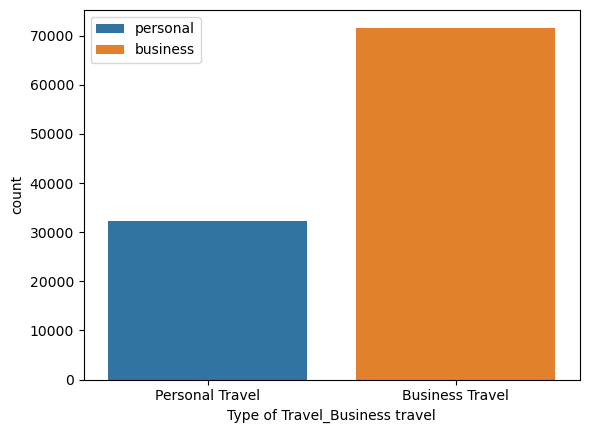

In [107]:
sns.countplot(data=df,x='Type of Travel_Business travel',hue='Type of Travel_Business travel')
plt.xticks(labels=['Personal Travel','Business Travel'],ticks=[0,1])
plt.legend(['personal','business'])
plt.show()

### Plot a countplot of Customer Type

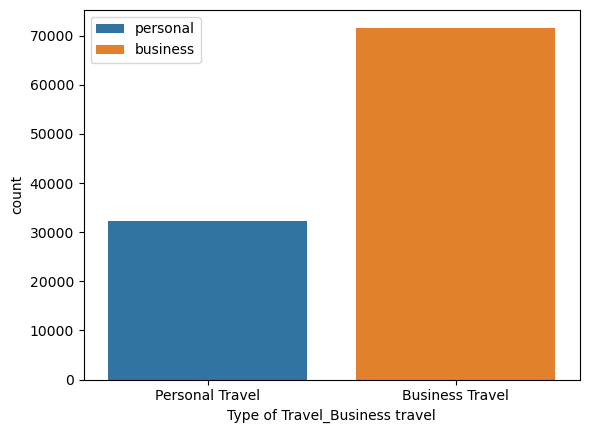

In [99]:
sns.countplot(data=df,x='Type of Travel_Business travel',hue='Type of Travel_Business travel')
plt.xticks(labels=['Personal Travel','Business Travel'],ticks=[0,1])
plt.legend(['personal','business'])
plt.show()

### Split the columns into input and target variables

In [101]:
X, y = df.drop('satisfaction',axis=1),df['satisfaction']

### Standardise the data using StandardScaler

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
st = StandardScaler()
X = pd.DataFrame(st.fit_transform(X),columns=st.get_feature_names_out())

In [105]:
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870,0.266393,0.073014,-1.015031,1.015031,0.472767,-0.472767,-1.490614,1.490614,-0.956906,-0.904327,3.586776
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.237539,-1.015031,1.015031,-2.115208,2.115208,0.670865,-0.670865,1.045034,-0.904327,-0.278802
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.392816,0.985192,-0.985192,0.472767,-0.472767,0.670865,-0.670865,1.045034,-0.904327,-0.278802
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.159901,0.985192,-0.985192,0.472767,-0.472767,0.670865,-0.670865,1.045034,-0.904327,-0.278802
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.392816,-1.015031,1.015031,0.472767,-0.472767,0.670865,-0.670865,1.045034,-0.904327,-0.278802


### Split the dataset into training and testing set

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
y_train

20921     0
36897     0
8468      0
53490     0
78687     0
         ..
54886     0
76820     0
103694    0
860       1
15795     0
Name: satisfaction, Length: 83123, dtype: int64

### Check the shape of X_train and X_test

In [91]:
X_train.shape

(83123, 27)

In [93]:
X_test.shape

(20781, 27)

### Create Random Forest model

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rd = RandomForestClassifier()

### Train the model with X_train and y_train

In [119]:
rd.fit(X_train,y_train)

RandomForestClassifier()

### Check the score of our trained model

In [123]:
rd.score(X_train,y_train)

0.9999639089060789

### Make predictions with X_test

In [125]:
y_pred = rd.predict(X_test)

### Check the acccuracy score of our prediction

In [127]:
from sklearn import metrics

In [129]:
metrics.accuracy_score(y_test,y_pred)

0.9629469226697464

### Create a confusion matrix

In [131]:
metrics.confusion_matrix(y_test,y_pred)

array([[11487,   226],
       [  544,  8524]], dtype=int64)

### Plot confusion matrix on heatmap

array([[11487,   226],
       [  544,  8524]], dtype=int64)

### Create classification report

***

# <span style = "color : green;font-size:40px"> Great Job! </span>